# 1. Import my CSV Datei

In [1]:
import pandas as pd


housing_pd = pd.read_csv("housing.csv")
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2 .Check for the Ocean_proximity values 

In [33]:
housing_pd['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# 3. take the complet data as simple 

In [34]:
housing_pd_suffled = housing_pd.sample(n = len(housing_pd),random_state=1) #take a simple but hier i take all the data as a simple <- make a copie of the data 
housing_pd_suffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


# 4. Convert the 'ocean_proximity' categorical column into multiple binary

In [35]:
pd.get_dummies(housing_pd_suffled['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False
...,...,...,...,...,...
10955,True,False,False,False,False
17289,True,False,False,False,False
5192,True,False,False,False,False
12172,False,True,False,False,False


In [36]:

# the result contains True/False, convert it to 1/0 using .astype(int).
pd.get_dummies(housing_pd_suffled['ocean_proximity']).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0
...,...,...,...,...,...
10955,1,0,0,0,0
17289,1,0,0,0,0
5192,1,0,0,0,0
12172,0,1,0,0,0


# 5. Concat the 2 Matrix 

In [37]:
# delete the ocean_proximity Colmn and concat the 2 matrix 
housing_pd_final = pd.concat([housing_pd_suffled.drop('ocean_proximity',axis=1), # 1/0 -> row or column
                              pd.get_dummies(housing_pd_suffled['ocean_proximity']).astype(int)],axis=1)

In [38]:
housing_pd_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0


# 6. change the columns 

In [39]:
housing_pd_final = housing_pd_final[['longitude','latitude',
                                     'housing_median_age','total_rooms',
                                     'total_bedrooms','population',
                                     'households','median_income',
                                     '<1H OCEAN','INLAND','ISLAND',
                                     'NEAR BAY','NEAR OCEAN','median_house_value']]
housing_pd_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0


# 7. data cleaning : remobe all null values 

In [40]:
housing_pd_final = housing_pd_final.dropna()# drop null value
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


# 8. train, test  data 

In [43]:
#train_pd, test_pd, validate_pd = housing_pd_final[:18000],housing_pd_final[18000:19215],housing_pd_final[19215:]
train_pd, test_pd = housing_pd_final[:19215],housing_pd_final[19215:]
#, validate_pd ,housing_pd_final[19215:]
#len(train_pd),len(test_pd),len(validate_pd)
len(train_pd),len(test_pd), len(housing_pd_final)

(19215, 1218, 20433)

# 9. Separate X and Y Data, for each groupe 

In [44]:
x_train, y_train = train_pd.to_numpy()[:,:-1],train_pd.to_numpy()[:,-1] # the x take all the column except the last one, and y take just the last one

#x_validate, y_validate = validate_pd.to_numpy()[:,:-1],validate_pd.to_numpy()[:,-1]

x_test, y_test = test_pd.to_numpy()[:,:-1],test_pd.to_numpy()[:,-1]

x_train.shape, y_train.shape, x_test.shape, y_test.shape # x_validate.shape, y_validate.shape,

((19215, 13), (19215,), (1218, 13), (1218,))

# 10. Change the data scalling 

In [45]:
# we need to change the scalle that we have, if we leave it like this, our model will think the difference between, 800 and 850 is better then th difference between 1 and 8
# Y is just 1 column so we dont need to scalle it 
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler() # create object
scaler.fit(x_train[:,:8]) # fit the data, 0 -> 7, first 8 columns 
def preprocessing(x):
  A = np.copy(x)
  A[:,:8] = scaler.transform(A[:,:8])#
  return A
x_train_preprocessed = preprocessing(x_train)
#x_validate_preprocessed = preprocessing(x_validate)
x_test_preprocessed = preprocessing(x_test)
x_train_preprocessed

array([[ 0.6058104 , -0.73811686,  0.82235839, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10296343,  0.53542285,  0.66330279, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42068378,  0.98022532,  1.37905296, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.61080176, -0.67724915,  1.29952516, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34581331,  0.88190056,  0.5042472 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.11121915,  0.78825794, -1.16583652, ...,  0.        ,
         0.        ,  0.        ]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

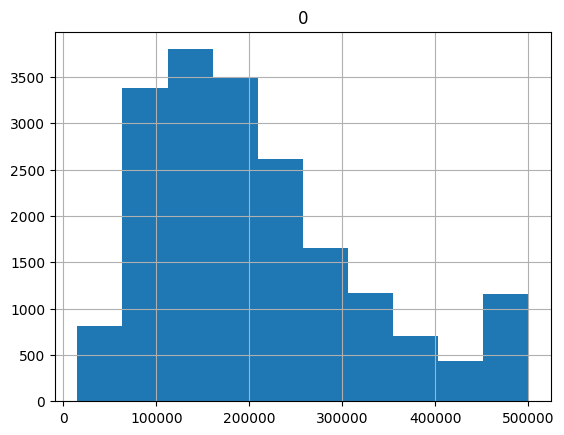

In [46]:
pd.DataFrame(y_train).hist()

In [47]:
# Reshape y to 2D array for scaler
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# Fit and transform y
y_train_preprocessed  = scaler.fit_transform(y_train)
y_test_preprocessed = scaler.fit_transform(y_test)

array([[<Axes: title={'center': '0'}>]], dtype=object)

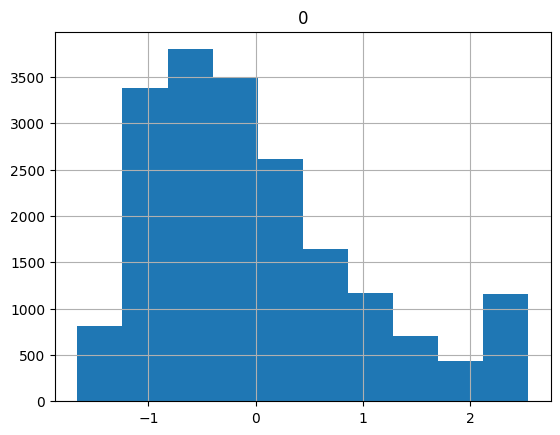

In [48]:
pd.DataFrame(y_train_preprocessed).hist()

# 11. difference between the x train and x train preproccesed

array([[<Axes: title={'center': '0'}>]], dtype=object)

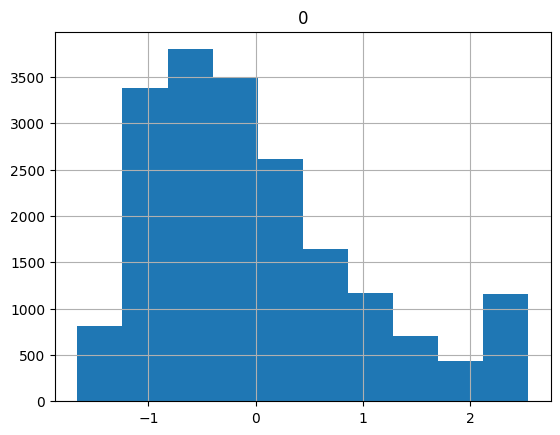

In [49]:
pd.DataFrame(y_train_preprocessed).hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

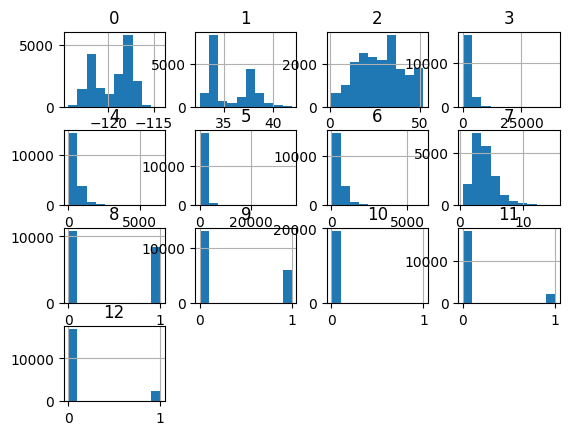

In [50]:
pd.DataFrame(x_train).hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

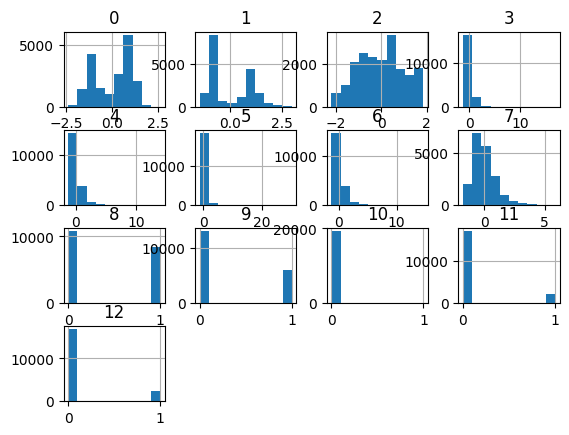

In [51]:
pd.DataFrame(x_train_preprocessed).hist()

<Axes: >

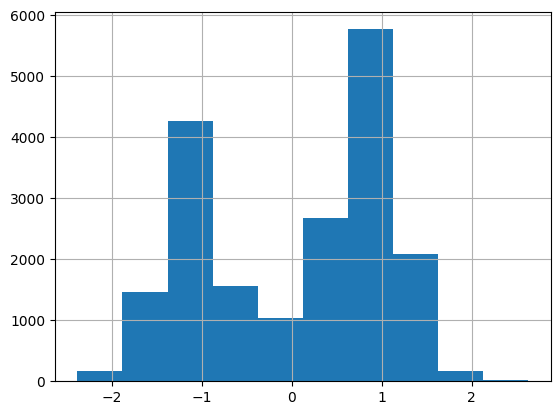

In [52]:
pd.DataFrame(x_train_preprocessed)[0].hist()

In [53]:
x_train_preprocessed

array([[ 0.6058104 , -0.73811686,  0.82235839, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10296343,  0.53542285,  0.66330279, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42068378,  0.98022532,  1.37905296, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.61080176, -0.67724915,  1.29952516, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34581331,  0.88190056,  0.5042472 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.11121915,  0.78825794, -1.16583652, ...,  0.        ,
         0.        ,  0.        ]])

# 11. Implement the SGD and Linear Gradient Descent 

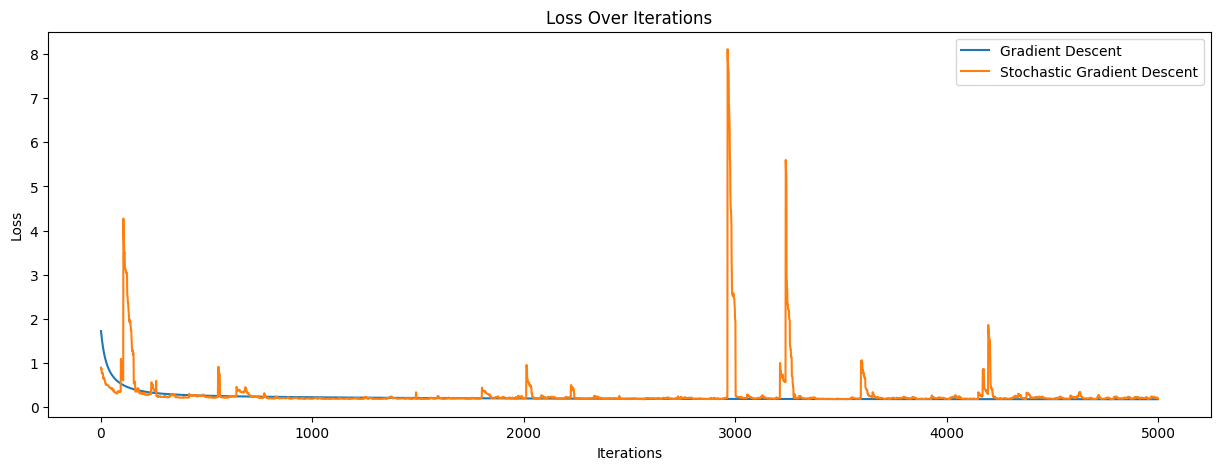

Gradient Descent Test MSE: 0.37902873539657783
Stochastic Gradient Descent Test MSE: 0.4104945903615386
Gradient Descent Runtime: 0.4160 seconds
Stochastic Gradient Descent Runtime: 0.3658 seconds


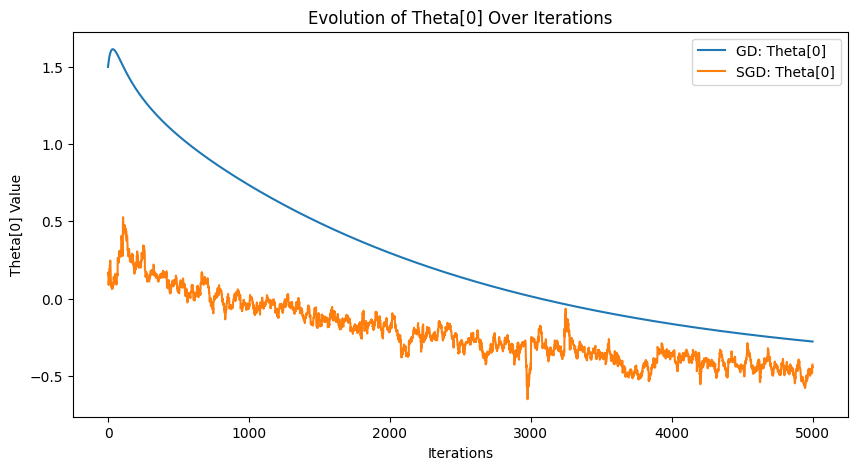

Final Results:
Gradient Descent: Final Training Loss = 0.1782, Test MSE = 0.3790, Time = 0.4160 seconds
Stochastic Gradient Descent: Final Training Loss = 0.1955, Test MSE = 0.4105, Time = 0.3658 seconds


In [54]:
import matplotlib.pyplot as plt
import time



def compute_mse(X, y, theta):
    predictions = X.dot(theta)
    mse = np.mean((predictions - y) ** 2)
    return mse
# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    X = X.astype(np.float64) # convert X to float64
    y = y.astype(np.float64) # convert y to float64

    m, n = X.shape  # m is number of samples, n is number of features
    theta = np.random.randn(n, 1)  # Ensure theta is (n_features, 1)
    y = y.reshape(-1, 1)  # Ensure y is (n_samples, 1) if not already
    theta_history = []  # To track the evolution of theta
    loss_history = []
    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = np.mean(errors ** 2) /2
        loss_history.append(loss)
        theta_history.append(theta.copy())  # Store current theta
    return theta, loss_history, theta_history

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size=1):
    X = X.astype(np.float64)  # Ensure X is float64
    y = y.reshape(-1, 1).astype(np.float64)  # Ensure y is (m, 1) and float64
    
    m, n = X.shape  # m: number of samples, n: number of features
    theta = np.random.randn(n, 1)  # Random initialization of theta (n_features, 1)
    loss_history = []
    theta_history = []  # To track the evolution of theta
    for iteration in range(n_iterations):
        # Get random batch of data
        indices = np.random.randint(m, size=batch_size)
        X_i = X[indices]
        y_i = y[indices]
        
        # Compute gradients and update theta
        gradients = 2/batch_size * X_i.T.dot(X_i.dot(theta) - y_i)
        theta -= learning_rate * gradients
        
        # Compute loss for the entire dataset (optional but useful for tracking)
        loss = np.mean((y - X.dot(theta)) ** 2) / 2
        loss_history.append(loss)
        theta_history.append(theta.copy())  # Store current theta
        
    return theta, loss_history, theta_history

# Training models
start_time_gd = time.time()
theta_gd, loss_history_gd, theta_history_gd = gradient_descent(x_train_preprocessed, y_train_preprocessed, learning_rate=0.01, n_iterations=5000)
end_time_gd = time.time()
time_gd = end_time_gd - start_time_gd

start_time_sgd = time.time()
theta_sgd, loss_history_sgd, theta_history_sgd = stochastic_gradient_descent(x_train_preprocessed, y_train_preprocessed, learning_rate=0.01, n_iterations=5000)
end_time_sgd = time.time()
time_sgd = end_time_sgd - start_time_sgd


# Visualize loss history for both GD and SGD
plt.figure(figsize=(15, 5))
plt.plot(loss_history_gd, label='Gradient Descent')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent')
plt.title('Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test error (MSE) for both algorithms
mse_gd = compute_mse(x_test_preprocessed, y_test_preprocessed, theta_gd)
mse_sgd = compute_mse(x_test_preprocessed, y_test_preprocessed, theta_sgd)

print(f"Gradient Descent Test MSE: {mse_gd}")
print(f"Stochastic Gradient Descent Test MSE: {mse_sgd}")

# Time comparison
print(f"Gradient Descent Runtime: {time_gd:.4f} seconds")
print(f"Stochastic Gradient Descent Runtime: {time_sgd:.4f} seconds")

# Visualize the evolution of theta[0] (first parameter)
plt.figure(figsize=(10, 5))
plt.plot([theta[0][0] for theta in theta_history_gd], label="GD: Theta[0]")
plt.plot([theta[0][0] for theta in theta_history_sgd], label="SGD: Theta[0]")
plt.title("Evolution of Theta[0] Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Theta[0] Value")
plt.legend()
plt.show()

# Final results summary
print("Final Results:")
print(f"Gradient Descent: Final Training Loss = {loss_history_gd[-1]:.4f}, Test MSE = {mse_gd:.4f}, Time = {time_gd:.4f} seconds")
print(f"Stochastic Gradient Descent: Final Training Loss = {loss_history_sgd[-1]:.4f}, Test MSE = {mse_sgd:.4f}, Time = {time_sgd:.4f} seconds")





In [58]:
# Vorhersagen für den Testdatensatz machen
y_pred_gd = x_test_preprocessed.dot(theta_gd)  # Für Gradient Descent
y_pred_sgd = x_test_preprocessed.dot(theta_sgd)  # Für Stochastic Gradient Descent

# Falls y skaliert wurde, hier eine hypothetische Inversskalierung:
y_pred_gd = scaler.inverse_transform(y_pred_gd)
y_pred_sgd = scaler.inverse_transform(y_pred_sgd)
y_test_preprocessed = scaler.inverse_transform(y_test_preprocessed)
# Preise anzeigen
print(f"Erste 10 Vorhersagen (GD): {y_pred_gd[:10].flatten()}")
print(f"Erste 10 Vorhersagen (SGD): {y_pred_sgd[:10].flatten()}")

# Möglicherweise könntest du auch den tatsächlichen Wert gegenüberstellen:
print(f"Tatsächliche Werte: {y_test_preprocessed[:10].flatten()}")

Erste 10 Vorhersagen (GD): [372672.69353145 272434.77948844 226127.84941215 259726.82871165
 223793.81075325 101044.34212648 141807.10829506 165608.58880918
 251079.71911097 308937.10228622]
Erste 10 Vorhersagen (SGD): [359749.91669052 233726.31440984 248665.44859682 227376.51585164
 237512.10946632 117542.45074805 143046.27737223 189387.99273732
 287861.46104525 316893.52604079]
Tatsächliche Werte: [442900. 309500. 240300. 267000. 190800. 175000. 124700. 176800. 161400.
 244800.]


# 13. test 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
def plot_theta_3d(theta_history_gd, theta_history_sgd):
    # Extract theta values
    theta_gd_0 = [theta[0][0] for theta in theta_history_gd]
    theta_gd_1 = [theta[1][0] for theta in theta_history_gd]
    theta_sgd_0 = [theta[0][0] for theta in theta_history_sgd]
    theta_sgd_1 = [theta[1][0] for theta in theta_history_sgd]
    
    iterations_gd = range(len(theta_history_gd))
    iterations_sgd = range(len(theta_history_sgd))

    # Create 3D plots
    fig = plt.figure(figsize=(15, 10))

    # Gradient Descent 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot(iterations_gd, theta_gd_0, theta_gd_1, label='Gradient Descent')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Theta[0]')
    ax1.set_zlabel('Theta[1]')
    ax1.set_title('Theta Evolution - Gradient Descent')
    ax1.legend()

    # Stochastic Gradient Descent 3D plot
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot(iterations_sgd, theta_sgd_0, theta_sgd_1, label='Stochastic Gradient Descent', color='orange')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Theta[0]')
    ax2.set_zlabel('Theta[1]')
    ax2.set_title('Theta Evolution - Stochastic Gradient Descent')
    ax2.legend()

    plt.show()

# Call the function with your theta history
plot_theta_3d(theta_history_gd, theta_history_sgd)

NameError: name 'theta_history_gd' is not defined

# 14 second implementation

Early stopping at iteration 278
Early stopping at iteration 26


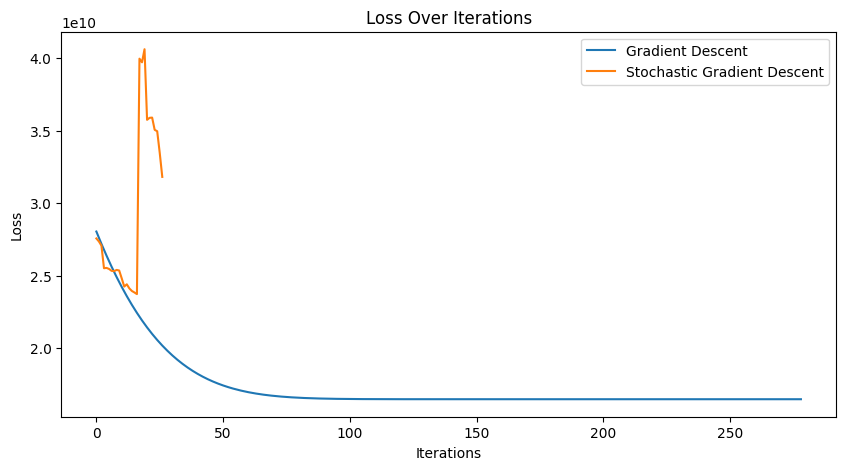

Gradient Descent Test MSE: 33025677975.66933
Stochastic Gradient Descent Test MSE: 65554460630.259285
Gradient Descent Runtime: 0.0230 seconds
Stochastic Gradient Descent Runtime: 0.0030 seconds


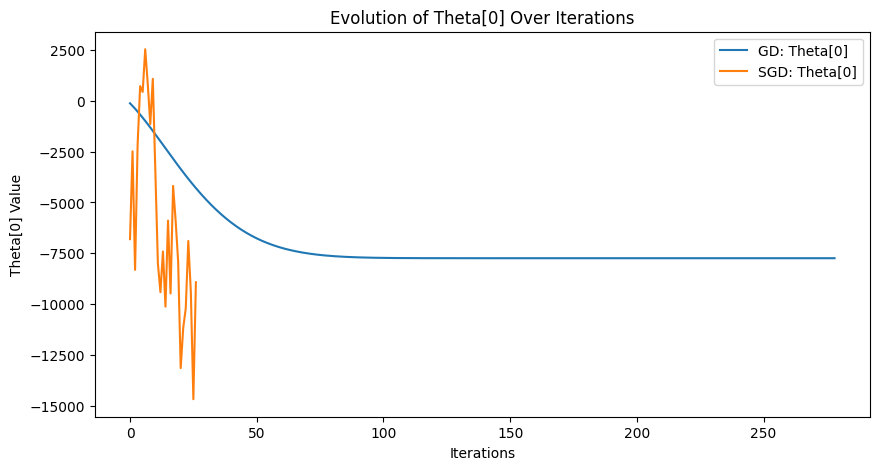

Final Results:
Gradient Descent: Final Training Loss = 16474537532.4236, Test MSE = 33025677975.6693, Time = 0.0230 seconds
Stochastic Gradient Descent: Final Training Loss = 31814136639.0785, Test MSE = 65554460630.2593, Time = 0.0030 seconds


In [80]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, decay_rate=0.001, tolerance=1e-6, patience=10):
    X = X.astype(np.float64)  # Ensure X is float64
    y = y.astype(np.float64)  # Ensure y is float64

    m, n = X.shape  # m: number of samples, n: number of features
    theta = np.random.randn(n, 1)  # Random initialization of theta (n_features, 1)
    y = y.reshape(-1, 1)  # Ensure y is (n_samples, 1) if not already
    theta_history = []  # To track the evolution of theta
    loss_history = []
    best_loss = float('inf')
    no_improvement_count = 0  # Early stopping count

    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = np.mean(errors ** 2) / 2
        loss_history.append(loss)
        theta_history.append(theta.copy())  # Store current theta
        
        # Apply learning rate decay
        learning_rate = learning_rate / (1 + decay_rate * iteration)

        # Early stopping: Stop if no improvement in loss
        if loss < best_loss - tolerance:
            best_loss = loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {iteration}")
            break
    
    return theta, loss_history, theta_history

# Stochastic Gradient Descent Function with batch size, learning rate decay, and early stopping
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size=32, decay_rate=0.001, tolerance=1e-6, patience=10):
    X = X.astype(np.float64)  # Ensure X is float64
    y = y.reshape(-1, 1).astype(np.float64)  # Ensure y is (m, 1) and float64
    
    m, n = X.shape  # m: number of samples, n: number of features
    theta = np.random.randn(n, 1)  # Random initialization of theta (n_features, 1)
    loss_history = []
    theta_history = []  # To track the evolution of theta
    best_loss = float('inf')
    no_improvement_count = 0  # Early stopping count
    
    for iteration in range(n_iterations):
        # Get random batch of data
        indices = np.random.randint(m, size=batch_size)
        X_i = X[indices]
        y_i = y[indices]
        
        # Compute gradients and update theta
        gradients = 2/batch_size * X_i.T.dot(X_i.dot(theta) - y_i)
        theta -= learning_rate * gradients
        
        # Compute loss for the entire dataset (optional but useful for tracking)
        loss = np.mean((y - X.dot(theta)) ** 2) / 2
        loss_history.append(loss)
        theta_history.append(theta.copy())  # Store current theta

        # Apply learning rate decay
        learning_rate = learning_rate / (1 + decay_rate * iteration)

        # Early stopping: Stop if no improvement in loss
        if loss < best_loss - tolerance:
            best_loss = loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {iteration}")
            break
    
    return theta, loss_history, theta_history

# Training models
start_time_gd = time.time()
theta_gd, loss_history_gd, theta_history_gd = gradient_descent(x_train_preprocessed, y_train, learning_rate=0.01, n_iterations=10000, decay_rate=0.001)
end_time_gd = time.time()
time_gd = end_time_gd - start_time_gd

start_time_sgd = time.time()
theta_sgd, loss_history_sgd, theta_history_sgd = stochastic_gradient_descent(x_train_preprocessed, y_train, learning_rate=0.01, n_iterations=10000, batch_size=1, decay_rate=0.001)
end_time_sgd = time.time()
time_sgd = end_time_sgd - start_time_sgd

# Visualize loss history for both GD and SGD
plt.figure(figsize=(10, 5))
plt.plot(loss_history_gd, label='Gradient Descent')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent')
plt.title('Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test error (MSE) for both algorithms
mse_gd = compute_mse(x_test_preprocessed, y_test, theta_gd)
mse_sgd = compute_mse(x_test_preprocessed, y_test, theta_sgd)

print(f"Gradient Descent Test MSE: {mse_gd}")
print(f"Stochastic Gradient Descent Test MSE: {mse_sgd}")

# Time comparison
print(f"Gradient Descent Runtime: {time_gd:.4f} seconds")
print(f"Stochastic Gradient Descent Runtime: {time_sgd:.4f} seconds")

# Visualize the evolution of theta[0] (first parameter)
plt.figure(figsize=(10, 5))
plt.plot([theta[0][0] for theta in theta_history_gd], label="GD: Theta[0]")
plt.plot([theta[0][0] for theta in theta_history_sgd], label="SGD: Theta[0]")
plt.title("Evolution of Theta[0] Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Theta[0] Value")
plt.legend()
plt.show()

# Final results summary
print("Final Results:")
print(f"Gradient Descent: Final Training Loss = {loss_history_gd[-1]:.4f}, Test MSE = {mse_gd:.4f}, Time = {time_gd:.4f} seconds")
print(f"Stochastic Gradient Descent: Final Training Loss = {loss_history_sgd[-1]:.4f}, Test MSE = {mse_sgd:.4f}, Time = {time_sgd:.4f} seconds")

# 15. Test 

In [87]:
print(theta_sgd.shape)

(13, 1)


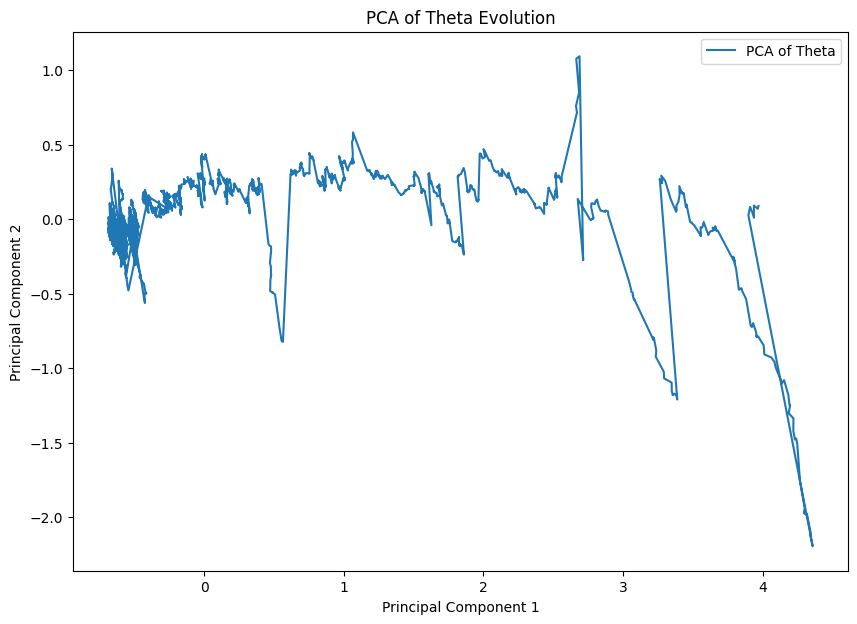

In [88]:
from sklearn.decomposition import PCA

def plot_pca(theta_history):
    # Convert theta history to a 2D array
    theta_array = np.array([theta.flatten() for theta in theta_history])
    
    # Apply PCA to reduce to 2D
    pca = PCA(n_components=2)
    theta_pca = pca.fit_transform(theta_array)
    
    # Plot PCA results
    plt.figure(figsize=(10, 7))
    plt.plot(theta_pca[:, 0], theta_pca[:, 1], label='PCA of Theta')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Theta Evolution')
    plt.legend()
    plt.show()

# Example usage
plot_pca(theta_history_sgd)

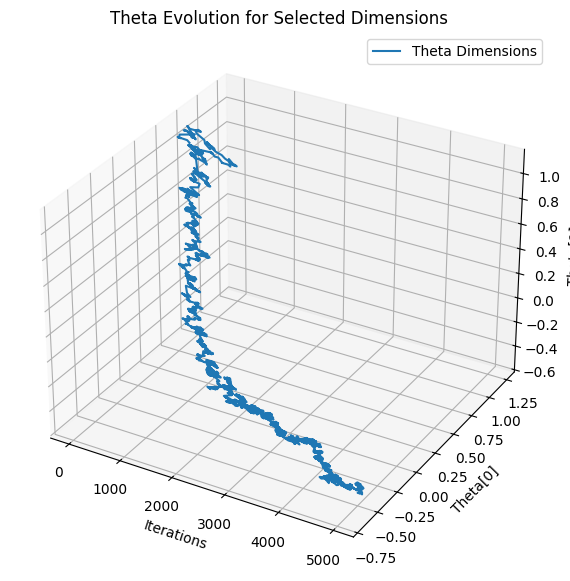

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_selected_dimensions(theta_history, dimensions=[0, 1]):
    # Extract specified dimensions
    theta_dim_0 = [theta[dimensions[0]][0] for theta in theta_history]
    theta_dim_1 = [theta[dimensions[1]][0] for theta in theta_history]
    iterations = range(len(theta_history))
    
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(iterations, theta_dim_0, theta_dim_1, label='Theta Dimensions')
    ax.set_xlabel('Iterations')
    ax.set_ylabel(f'Theta[{dimensions[0]}]')
    ax.set_zlabel(f'Theta[{dimensions[1]}]')
    ax.set_title('Theta Evolution for Selected Dimensions')
    ax.legend()
    plt.show()

# Example usage: Plot dimensions 0 and 1
plot_selected_dimensions(theta_history_sgd, dimensions=[0, 1])


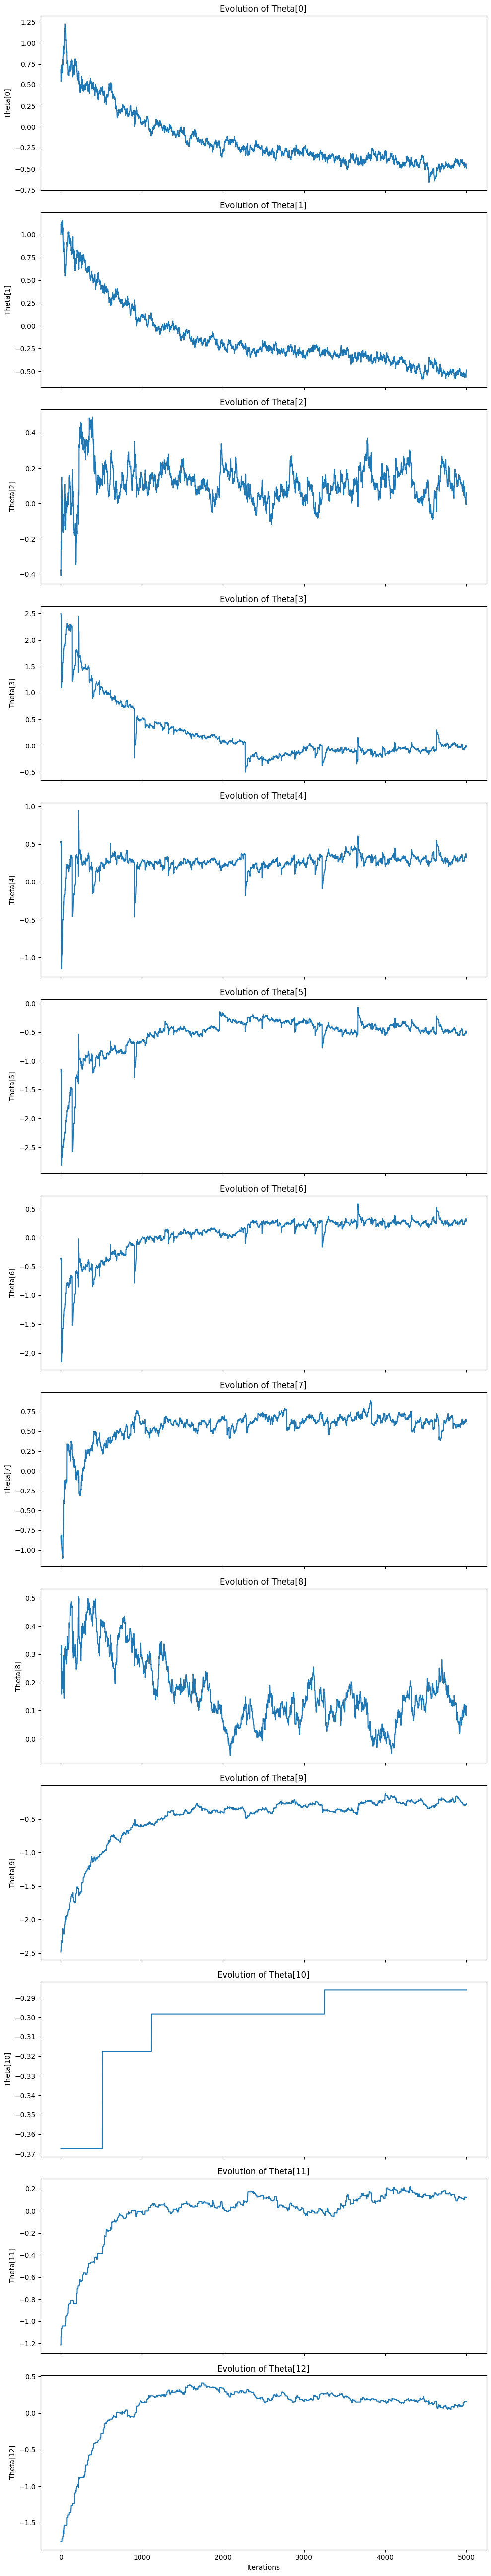

In [90]:
import matplotlib.pyplot as plt

def plot_all_dimensions(theta_history):
    num_dims = len(theta_history[0])
    fig, axes = plt.subplots(num_dims, 1, figsize=(10, num_dims * 4), sharex=True)
    
    for i in range(num_dims):
        dimension_values = [theta[i][0] for theta in theta_history]
        axes[i].plot(dimension_values)
        axes[i].set_ylabel(f'Theta[{i}]')
        axes[i].set_title(f'Evolution of Theta[{i}]')
    
    axes[-1].set_xlabel('Iterations')
    plt.tight_layout()
    plt.show()

# Example usage
plot_all_dimensions(theta_history_sgd)
